In [1]:
import torch
from torch import nn

torch.__version__

'2.5.1'

In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'"05 computer_vision_video.ipynb"
device

'cuda'

## 1. Get Data

In [3]:
# this dataset is a subset of food101 dataset(from pytorch) only 10% of the images
# images: 1k
import requests
import zipfile
from pathlib import Path

In [4]:
# setup path to a data folder
data_path = Path('data')
image_path = data_path / "pizza_steak_sushi"

# exist_ok
if image_path.is_dir():
    print(f"{image_path} directory already exist... skip download")
else:
    print(f"{image_path} directory is being created...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# download pizza, steak, sushi
with open(data_path/"pizza_sushi_steak.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, sushi, steak data...")
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path/"pizza_sushi_steak.zip", 'r') as zip_rep:
    print('Unzipping data...')
    zip_rep.extractall(image_path)

data\pizza_steak_sushi directory already exist... skip download
Unzipping data...


In [5]:
# data_path/"pizza_sushi_steak.zip"
image_path

WindowsPath('data/pizza_steak_sushi')

## 2. Becoming one with the data

In [6]:
import os

def walkthrough_dir(dir_path):
    """ Walks through dir_path returning its contents..."""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [8]:
# setup training and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1. Visualizing image

* get all image paths
* pick a random image path using `python` random.choice()
* get the image class name using `pathlib.path.parent.stem`
* since working with images, opwn image with PIL (pillow) `python`
* show the image and print metadata

data\pizza_steak_sushi\test\steak\502076.jpg
Random image path: data\pizza_steak_sushi\test\steak\502076.jpg
Image class: steak
Image height: 512
Image width: 512


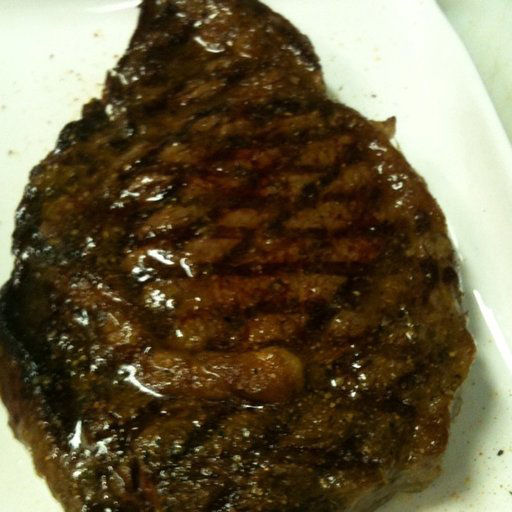

In [9]:
import random
from PIL import Image

# set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3.  get image class (name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

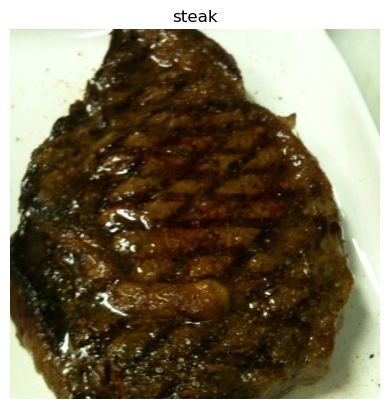

In [10]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.title(image_class)
plt.axis(False)



## Transforming data

before we can use image data with pytorch, or any other type of dataset, we have to:

* turn target data into tensors
* turn it into `torch.utils.data.dataset` and subsequesntly a `torch.utils.data.dataloader`

In [11]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

### 3.1 Transformin data with `torchvision.transforms`

In [20]:
# write a transform for image
data_transform =  transforms.Compose([ # turn images into tensors
    # Resize images to (64,64)
    transforms.Resize(size=(224,224)),
    # Flip images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a torch.Tensor
    transforms.ToTensor()
])

In [22]:
data_transform(img)

tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8353, 0.8314],
         [0.8667, 0.8745, 0.8745,  ..., 0.8471, 0.8392, 0.8431],
         [0.8745, 0.8745, 0.8745,  ..., 0.8471, 0.8510, 0.8471],
         ...,
         [0.9294, 0.9255, 0.9294,  ..., 0.9373, 0.9490, 0.9490],
         [0.9255, 0.9294, 0.9333,  ..., 0.9451, 0.9529, 0.9451],
         [0.9294, 0.9333, 0.9373,  ..., 0.9490, 0.9529, 0.9569]],

        [[0.9098, 0.9098, 0.9137,  ..., 0.9333, 0.9216, 0.9176],
         [0.9176, 0.9255, 0.9255,  ..., 0.9294, 0.9216, 0.9255],
         [0.9255, 0.9255, 0.9255,  ..., 0.9255, 0.9255, 0.9216],
         ...,
         [0.9725, 0.9686, 0.9725,  ..., 0.9765, 0.9882, 0.9882],
         [0.9686, 0.9686, 0.9725,  ..., 0.9843, 0.9922, 0.9843],
         [0.9686, 0.9725, 0.9765,  ..., 0.9882, 0.9922, 0.9961]],

        [[0.8078, 0.8078, 0.8118,  ..., 0.8000, 0.7804, 0.7765],
         [0.8157, 0.8235, 0.8235,  ..., 0.8000, 0.7882, 0.7882],
         [0.8235, 0.8235, 0.8235,  ..., 0.8039, 0.8000, 0.

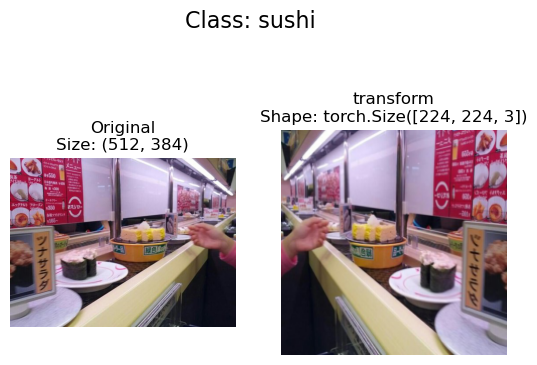

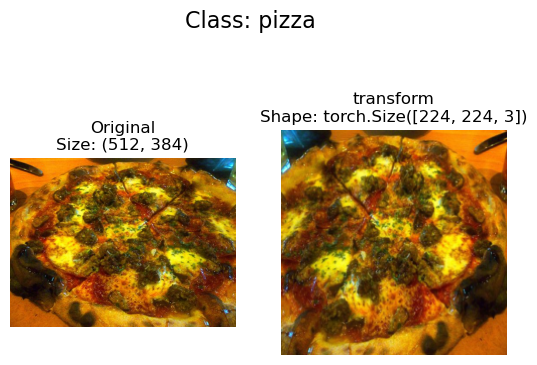

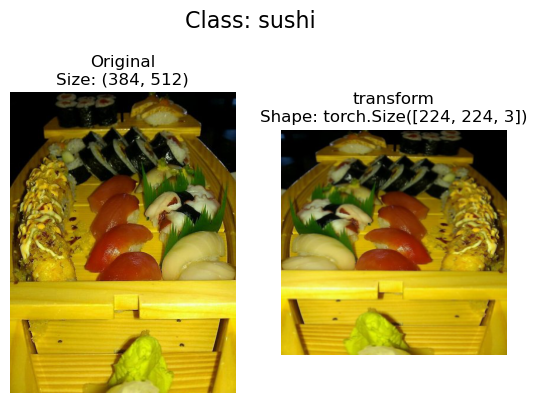

In [34]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    """ 
    Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version
    """

    if seed: random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transform\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)



### 4. Option 1: Loading image data using `ImageFolder`

In [35]:
# Use imagefoler to create a dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform = None) # transform for the target/label

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [38]:
# Get class names as a list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [40]:
# get classnames as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [42]:
# check the length of the dataset
len(train_data), len(test_data)

(225, 75)

In [60]:
# Index on the train_data Dataset to get a single image and its label
img, label = train_data[0][0], train_data[0][1] 
# print(f"Image tensor:\m {img}")
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Image label: {label}")
print(f"label dtype: {type(label)}")

Image shape: torch.Size([3, 224, 224])
Image dtype: torch.float32
Image label: 0
label dtype: <class 'int'>


Original image shape: torch.Size([3, 224, 224]) -> [color channels, height, width]
Image permute: torch.Size([224, 224, 3]) -> [height, width, color channels]


Text(0.5, 1.0, 'pizza')

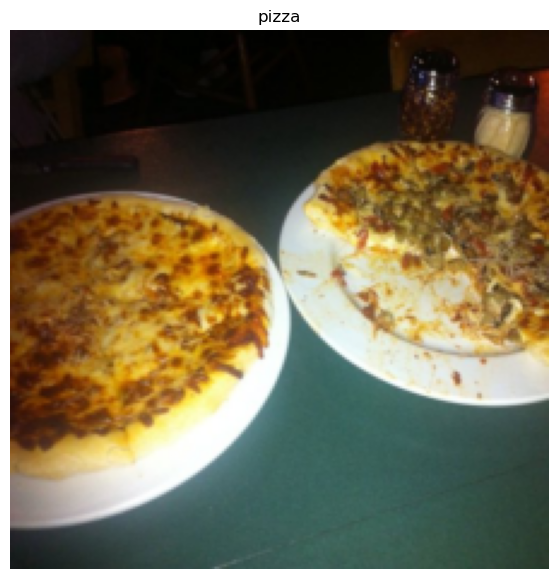

In [62]:
# Rearreange the orader dimensions of the image tensor
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original image shape: {img.shape} -> [color channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color channels]") 

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute) 
plt.axis(False) 
plt.title(class_name[label])